<a name="top"></a>
# Predicting Real/Fake News

## 2-Preprocessing-and-Exploratory-Data-Analysis
---
* [Problem Statement](#Problem-Statement)
* [Executive Summary](#Executive-Summary)
    * [Context](#Context)
    * [Scope](#Scope)
* [Data Dictionary](#Data-Dictionary)
* [Importing Libraries](#Importing-Libraries)
    * [Loading Corpus](#Loading-Corpus)
* [Feature Engineering](#Feature-Engineering)
* [Data Analysis](#Data-Analysis)
  * [Balance of Classes](#Balance-of-Classes)
  * [Numerical Analysis](#Numerical-Analysis)
      * [Title-Length](#Title-Length)
      * [Text-Length](#Text-Length)
  * [Text Analysis](#Text-Analysis)
      * [Bar-Plots](#Bar-Plots')
      * [Word-Clouds](#Word-Clouds)
      * [Venn-Diagram](#Venn-Diagram)
* [Saving Corpus](#Saving-Corpus)

## Problem Statement

**To predict real/fake news** based on a kaggle dataset containing various news sources within the US.

## Executive Summary

### Context

Fake news has risen dramatically in popular consciousness over the last few years. According to a Pew Research Center study, Americans deem fake news to be a larger problem than racism, climate change or terrorism. With the advent of social media and the amount of information accessible to us, it is getting increasingly difficult to distinguish between real news and fake news. Therefore, this could have severe repercussions within society if the problem is not dealt with. 

### Scope

The goal of this project was to come up with a model that distinguishes real and fake news using a kaggle data set that contains real news and fake news based on US news outlets. In order to tackle the problem of fake news, several classification models such as the Logistic Regression and Decision trees were applied. It is worth pointing out that the data set is limited in terms of its time frame where news was collated between 2015 and 2018 and also only based on US news outlets. However, the model that has been trained can certainly be helpful in other countries as well.

## Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|title|object|true/fake kaggle|title of news article| 
|text|object|true/fake kaggle|content of the news|
|category|int|true/fake kaggle|"1" = true, "0" = fake (target variable)|
|title_length|int|true/fake kaggle|number of words in title of news article| 
|text_length|int|true/fake kaggle|number of words in content of news|

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from sklearn.feature_extraction import text
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Doc
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import re,string,unicodedata

warnings.filterwarnings('ignore')
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
pd.set_option('display.max_colwidth', None)

from tqdm import tqdm
import time

### Loading Corpus

In [2]:
import pandas as pd

df = pd.read_pickle("corpus.pkl")
df.head()

title  \
0        as us budget fight looms republicans flip their fiscal script   
1        us military to accept transgender recruits on monday pentagon   
2               senior us republican senator let mr mueller do his job   
3            fbi russia probe helped by australian diplomat tipoff nyt   
4  trump wants postal service to charge much more for amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Feature Engineering

Engineer two new features.

- Number of words for title
- Number of words for text

In [3]:
# Function that returns number of words in a string
def word_count(string):
    # Split the strings into words
    words= string.split()
    
    # Return length of words list
    return len(words)

In [4]:
# Create number of words for both title and text
df['title_length'] = df['title'].apply(word_count)
df['text_length'] = df['text'].apply(word_count)

In [5]:
df.head()

title  \
0        as us budget fight looms republicans flip their fiscal script   
1        us military to accept transgender recruits on monday pentagon   
2               senior us republican senator let mr mueller do his job   
3            fbi russia probe helped by australian diplomat tipoff nyt   
4  trump wants postal service to charge much more for amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## Data Analysis

### Balance of Classes

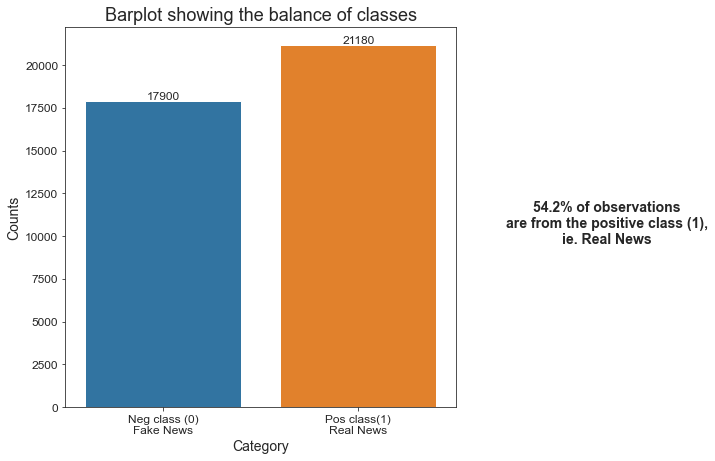

In [6]:
# Plotting the balance of classes on a countplot.

neg_class_count = df['category'].value_counts()[0]
pos_class_count = df['category'].value_counts()[1]
pos_class_pct = df['category'].value_counts(normalize=True)[1] * 100

plt.figure(figsize=(7,7))

ax = sns.countplot(x='category', data=df)

ax.set_xticklabels(['Neg class (0)\nFake News', 'Pos class(1)\nReal News'])
ax.tick_params(axis='both', labelsize=12)

plt.xlabel("Category", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.title("Barplot showing the balance of classes", fontsize=18)

plt.text(x=0, y=neg_class_count+100, s=str(neg_class_count), fontsize=12, ha='center')
plt.text(x=1, y=pos_class_count+100, s=str(pos_class_count), fontsize=12, ha='center')

plt.figtext(x=1.20, 
            y=0.45, 
            s=f"{round(pos_class_pct, 2)}% of observations\nare from the positive class (1),\nie. Real News", 
            fontsize=14, 
            fontweight='bold',
            ha='center'
           );


In [ ]:
plt.figure(figsize = (12,12)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (12,12)) # Text that is not Fake
wc = WordCloud(max_words = 2000, stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### Numerical analysis

In terms of the number of words for both the title and the text, an interesting finding emerges. Real news seem to have a much higher minimum number of words in terms of the text as compared to Fake news.

#### Title Length

In [7]:
# Multiple grouped summaries
# Title length

df.groupby("category")["title_length"].agg([min, max, sum])

,min,max,sum
category,,,
0,2,40,250832
1,4,20,208492


In [8]:
# Group by to pivot table [Multiple Statistics]
# Title Length

df.pivot_table(values='title_length', index='category', aggfunc=[np.mean, np.median])

,mean,median
,title_length,title_length
category,,
0,14.012961,14
1,9.843815,10


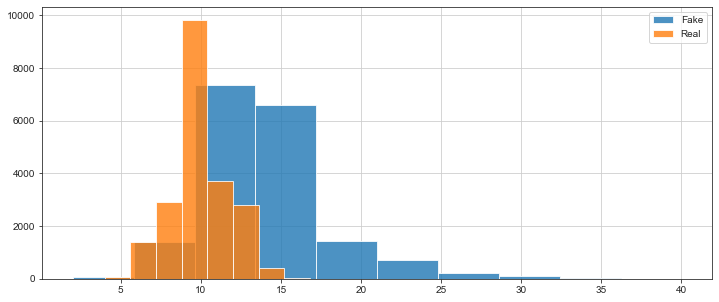

In [9]:
plt.figure(figsize=(12,5))
df[df["category"]==0]["title_length"].hist(alpha=0.8) 
df[df["category"]==1]["title_length"].hist(alpha=0.8) 
plt.legend(["Fake", "Real"])
plt.show()

#### Text Length

In [10]:
# Multiple grouped summaries
# Text Length

df.groupby("category")["text_length"].agg([min, max, sum])

,min,max,sum
category,,,
0,0,8020,7300413
1,0,4969,8006242


In [11]:
# Group by to pivot table [Multiple Statistics]
# Text Length

df.pivot_table(values='text_length', index='category', aggfunc=[np.mean, np.median])

,mean,median
,text_length,text_length
category,,
0,407.844302,366
1,378.009537,352


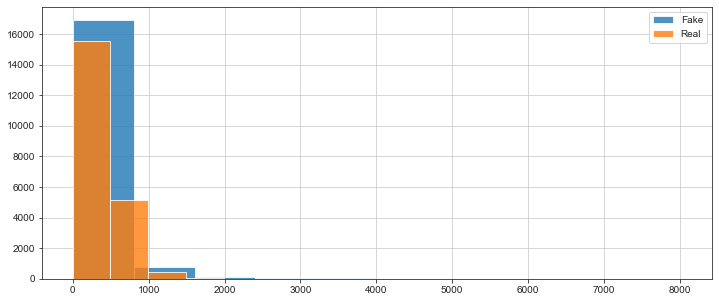

In [12]:
plt.figure(figsize=(12,5))
df[df["category"]==0]["text_length"].hist(alpha=0.8) 
df[df["category"]==1]["text_length"].hist(alpha=0.8) 
plt.legend(["Fake", "Real"])
plt.show()

In [13]:
df['title'][4]

'trump wants postal service to charge much more for amazon shipments'

### Text Analysis

Few things emerge from the initial text analysis. After inspecting both the title and the text of the news article, there are some words that could be added into the list of stopwords in order to have a higher predictive value. Words such as 'trump','said','says','video' tend to be very common in these documents. The venn diagram also illustrates that there is a large number of intersecting tokens in both the title and text and therefore, they will be merged in order to increase their predictive value. 

#### Barplots

In [14]:
cvec = CountVectorizer(max_features =500, stop_words=ENGLISH_STOP_WORDS)

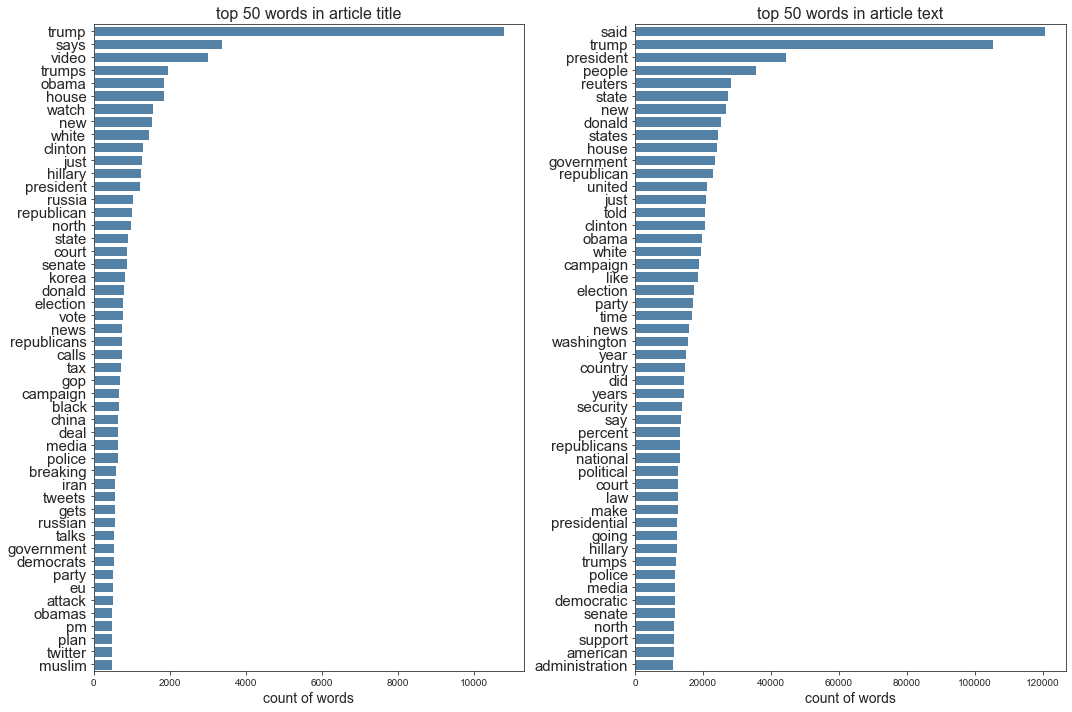

In [15]:
# Fit/transform count vectoriser to title and get the 50 phrases with the highest count
vec_title = cvec.fit_transform(df['title'])
vec_title = pd.DataFrame(vec_title.toarray(), columns = cvec.get_feature_names())
title_50 = vec_title.sum().sort_values(ascending=False).head(50)

# Fit/transform count vectoriser to text and get the 50 phrases with the highest count
vec_text = cvec.fit_transform(df['text'])
vec_text = pd.DataFrame(vec_text.toarray(), columns = cvec.get_feature_names())
text_50 = vec_text.sum().sort_values(ascending=False).head(50)

# Plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = False)

sns.barplot(y=title_50.index.values, x = title_50,color='steelblue',ax=ax[0])
ax[0].set_title('top 50 words in article title',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=15)

sns.barplot(y=text_50.index.values, x = text_50,color='steelblue',ax=ax[1])
ax[1].set_title('top 50 words in article text',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=15)

plt.tight_layout()



#### WordClouds

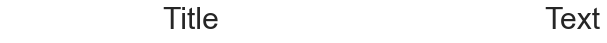

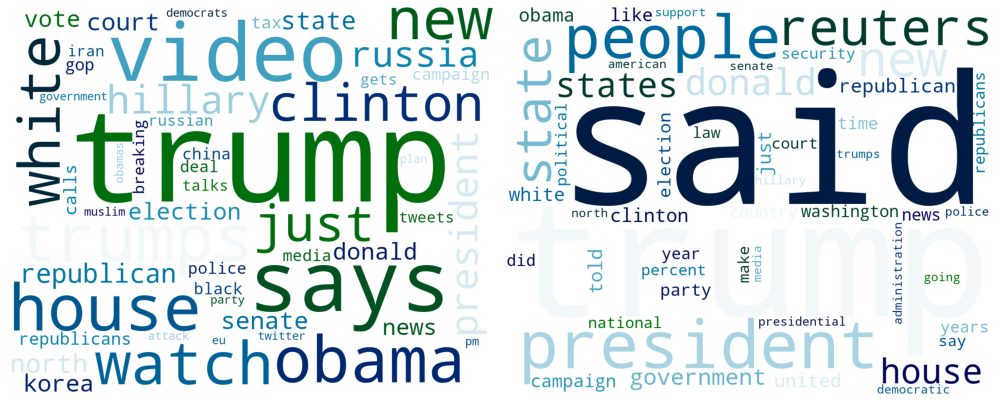

In [16]:
# Set up WordCloud
wc_title = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white',
                  colormap='ocean').generate_from_frequencies(title_50) 

wc_text = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white',
                  colormap='ocean').generate_from_frequencies(text_50) 

plt.figure(figsize=(8, 0.3))
plt.text(x = 0.35,                              
         y = 0.9,                             
         s = 'Title                                       Text', 
         ha = 'left',                        
         va = 'center',                       
         size = 30)                         
plt.axis('off')

# plot the WordCloud image 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].imshow(wc_title)
ax[0].axis('off')
ax[1].imshow(wc_text)
ax[1].axis('off')
plt.tight_layout()

#### Venn Diagram

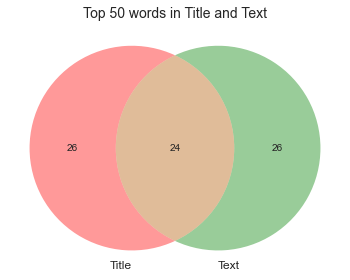

In [17]:
venn2([set(title_50.index), set(text_50.index)], set_labels = ('Title','Text'))
plt.title('Top 50 words in Title and Text', fontsize=14)
plt.tight_layout()

## Saving Corpus

In [18]:
# Get a sense of the cleaned data frame

display(df.head())
print(df.info())
print()
print(df.shape)

import pickle
df.to_pickle("corpuseda.pkl")

title  \
0        as us budget fight looms republicans flip their fiscal script   
1        us military to accept transgender recruits on monday pentagon   
2               senior us republican senator let mr mueller do his job   
3            fbi russia probe helped by australian diplomat tipoff nyt   
4  trump wants postal service to charge much more for amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39080 entries, 0 to 44119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39080 non-null  object
 1   text          39080 non-null  object
 2   category      39080 non-null  int64 
 3   title_length  39080 non-null  int64 
 4   text_length   39080 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.0+ MB
None

(39080, 5)
